<h1> Projeto 1 - Ciência dos dados </h1>

<h2> Gustavo Beltrão Braga - Engenharia 2C </h2>

<h2> Pergunta: Será que a porcentagem de saneamento básico, e de áreas florestais em um país, tem algum efeito em seu IDH? </h2>

<h3> Sumário: </h3>
<ol>

   <li>Imports, criando DataFrame de estudo e funções </li> 
   <li>Análise da variável: "% da área coberta por floresta (2015)" </li>
   <li>Análise da variável: "% de pessoas com saneamento básico (2015)" </li>
   <li>Análise de ambas variáveis em conjunto </li>
   <li>Análise das variáveis juntamente com os dados do IDH </li>
   <ul>
       <li>A) Análise do IDH juntamente com a variável  "% da área coberta por floresta (2015)" </li>
       <li>B) Análise do IDH juntamente com a variável "% de pessoas com saneamento básico (2015)" </li>
   </ul>
   <p></p>
   <li>Análise temporal </li>
   <ul>
       <li>A) Análise do IDH juntamente com a variável  "% da área coberta por floresta (temporal)" </li>
       <li>B) Análise do IDH juntamente com a variável "% de pessoas com saneamento básico (temporal)" </li>
   </ul>
   <p></p>
   <li>Conclusão </li>
</ol>

### Introdução:

A partir do Índice de Desenvolvimento Humano (IDH), resolvi investigar se o mesmo tem alguma relação entre a porcentagem que a população tem de saneamento básico e a porcentagem de área verde no país. Minha hipótese é a de que quando um país exibe um alto IDH, o mesmo investe muito em saneamento, já que é possível previnir muitas doenças e relacionados com o mesmo, o que diminuiria o indice de morte em todas as idades. Já para a área verde, os países que possuem mior IDH, também tem um nível de campanhas de consientização para área verde maior, já que existem mais pessoas com alta escolaridade, que sabem o papel que o verde causa em uma região, assim conservando-os.

## 1. Imports, criando DataFrame de estudo e funções

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
from math import *

#### Selecionando os dados do Excel, e separando de acordo com o ano de análise (2015).

In [23]:
HDI = pd.read_excel('hdi_human_development_index.xlsx').set_index('geo').loc[:, [2015]]
HDI.columns = ["IDH (2015)"]

elec = pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx').set_index('geo').loc[:, [2015]]
elec.columns = ["% de pessoas com saneamento básico (2015)"]

nt = pd.read_excel('forest_coverage_percent.xlsx').set_index('geo').loc[:, [2015]]
nt.columns = ["% da área coberta por floresta (2015)"]

#### Juntando os dados em apenas um DataFrame.

In [24]:
data = HDI.join(elec, how="inner")
data_base = data.join(nt, how="inner")
data_base.index.names = ['Country']

In [25]:
writer = pd.ExcelWriter('Projeto1.xlsx')
data_base.to_excel(writer,'Sheet1')
writer.save()

In [26]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color = color, linestyle = "dashed", linewidth = 3)
    plot.text(x - 25, y, nome + ": " + str(x)[:5] + "%", color = color)    
    plt.grid()

## 2. Análise da variável: "% da área coberta por floresta (2015)"


Com o objetivo de melhor entender dada variável, plotou-se um gráfico chamado de box. O mesmo indica que a mediana da variável, se encontra em pouco mais de 30% da área do país. Analisando o 1 e o 3 quartil, conclue-se que os dados estão em uma disposição visualmente bem dividida, sem grande acúmulo de dados para tanto o lado direito, quanto o esquerdo do gráfico, já que a distância de ambos ate a mediana (linha verde) está parecida, mas não igual (distância do 1 quartil ate mediana é visualmente maior). Porém, é necessário um histograma para melhor entender o funcionamento da variável. Como não há nenhum outlier (dados não consistentes com o resto da tabela, sendo representados por pontos), pode-se dizer que todos os pontos da variável seguem um mesmo padrão, o que é muito bom para a análise, já que não há a necessidade de estudar uma possivel explicação para tal outlier.

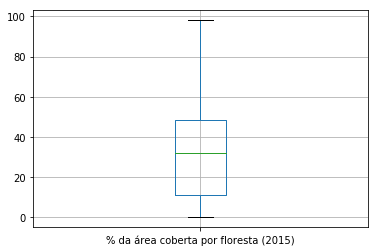

In [27]:
data_base.loc[:, "% da área coberta por floresta (2015)"].plot.box()
plt.grid()

Apesar de não conter o mesmo número de dados do box, o histograma possui propriedades visuais que nos permite ter uma noção da frequência e da moda dos dados, e como dito acima, não é possível tirar todas as informações apenas do box. Percebe-se que as porcentagens com maiores frequências sao de 0% - 10% e de 30% - 40%, já que são onde a maioria dos países se encontram. Apesar de muito parecidos, a moda se da entre 0% - 10%, por ser o retângulo de maior altura. Por efeito de análise, plotou-se onde seria a média dos dados representado pela linha vermelha (32.07%). É possível vizualizar também uma cauda para direita, o que significa que a frequência conforme a % do gráfico aumenta, tende a dmunuir. Por fim, utilizando da função describe, descobriu-se que o valor máximo e mínimo que os dados atingem, respectivamente, é 98.3% e 0%.

count    185.000000
mean      32.073189
std       23.696175
min        0.000000
25%       11.200000
50%       32.100000
75%       48.200000
max       98.300000
Name: % da área coberta por floresta (2015), dtype: float64

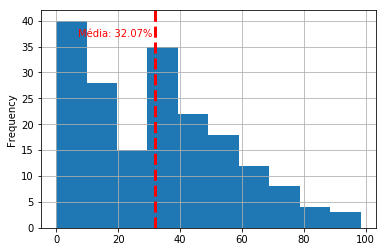

In [28]:

verticalLine(data_base.loc[:, "% da área coberta por floresta (2015)"].plot.hist(), data_base.loc[:, "% da área coberta por floresta (2015)"].mean(), 37, "r", "Média")
data_base["% da área coberta por floresta (2015)"].describe()

## 3. Análise da variável: "% de pessoas com saneamento básico (2015)"

Como na primeira variável, foi plotado um gráfico do tipo box, já que possui alto ferramental. A mediana esta em torno dos 90%, e diferentemente da primeira variável, o 1 e o 3 quartil estão bem diferentes quando se relaciona com a mediana. Pode-se dizer que os dados referentes ao 3 quartil até a mediana estão bem agrupados, em uma concentração muito grande, já que os mesmos estão a uma distância pequena comparada ao resto do box. Já do 1 quartil até a mediana a distância é muito maior, portanto, a dispersão dos dados nessa faixa é muito grande, o que significa um grande espalhamento na faixa em questão. Como na ultima variável, não existem outliers. Para melhor vizualizar os dados, o histograma foi plotado a na proxima célula.

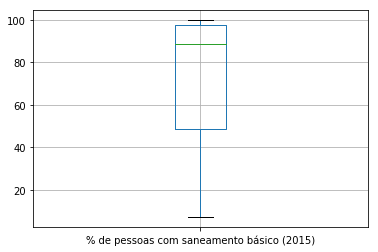

In [29]:
data_base.loc[:, "% de pessoas com saneamento básico (2015)"].plot.box()
plt.grid()

Como analisado acima, a base de dados da variável em estudo não tem uma alta variação, e que 90% dos mesmos se encontram em apenas uma faixa, de modo que sua moda pode ser facilmente identificada no ponto 90% - 100%. Portanto, o histograma tem uma  cauda para esquerda, o que significa que os dados estão mais concentrados na direita, e que a frequência tende a diminuir conforme a porcentagem abaixa. Desses dados na esquerda, a maioria se encontram com frequências aproximadas. A sua média é 74,07%, não se localizando assim dentro da moda, onde os dados se concentram. Por ser uma variável pouco espalhada, a mesma pode prejudicar a análise final, ou deixar os gráficos conclusivos pouco úteis. Como na primeira variável, o describe foi utilizado para identificar o valor mínimo, 7%, e máximo, 100% do banco de dados.

count    184.000000
mean      74.071304
std       29.144097
min        7.080000
25%       48.700000
50%       88.550000
75%       97.725000
max      100.000000
Name: % de pessoas com saneamento básico (2015), dtype: float64

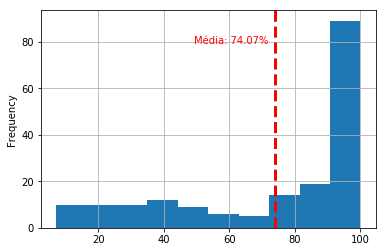

In [30]:
verticalLine(data_base.loc[:, "% de pessoas com saneamento básico (2015)"].plot.hist(), data_base.loc[:, "% de pessoas com saneamento básico (2015)"].mean(), 79, "r", "Média")
data_base["% de pessoas com saneamento básico (2015)"].describe()

## 4. Análise de ambas variáveis em conjunto

Apesar de não ser o objetivo da pergunta saber se ambas variáveis se correlacionam entre si, é muito importante checar se elas tem relação uma com a outra. O motivo 

O primeiro passo foi criar um novo DataFrame com apenas as duas variáveis isoladas do IDH. Chamado de coeficiente de correlação, esse valor vai de 0 a 1, sendo 0 um gráfico totalmente disperso, portanto com baixa correlação, e 1 aquele que está linear, o que significa alta correlação. Utilizando a função ".corr()", foi achado um valor de -0.023 de correlação entre a variável 1 e a 2. Diante desse valor, pode-se concluir que elas não são interligadas por uma relação, e muito menos parecidas, podendo assim continuar para a resposta da pergunta.

In [46]:
data_var = data_base.loc[:, ["% de pessoas com saneamento básico (2015)", "% da área coberta por floresta (2015)"]]
data_var.corr()

,% de pessoas com saneamento básico (2015),% da área coberta por floresta (2015)
% de pessoas com saneamento básico (2015),1.000000,-0.023895
% da área coberta por floresta (2015),-0.023895,1.000000


Gráfico de dispersão x por y, sendo x = "% de pessoas com saneamento básico (2015)", e y = "% da área coberta por floresta (2015)". Como esperado, os pontos estão bem dispersos, e chegam a ocupar grande parte da área do gráfico, o que significa que as variáveis não sao relacionadas.

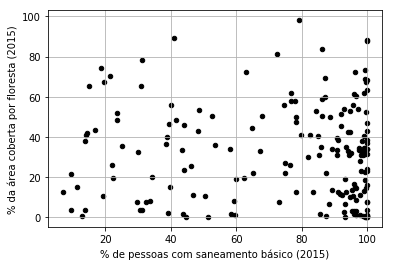

In [32]:
data_base.plot.scatter(x = "% de pessoas com saneamento básico (2015)", y = "% da área coberta por floresta (2015)", color=('black'))
plt.grid()

## 5. Análise das variáveis juntamente com os dados do IDH

A seguir a função da reta MMQ foi criada, com o intuito de chegar ao que supostamente seria uma "linha de tendência" entre a variável e o IDH. Além da função, foi adicionado faixas no DataFrame para uma melhor visualização visual ao plotar os gráficos mais tarde. Por fim, a correlação de todas as possibilidades de comparações foram plotadas, o que será uma grande ferramental para a conclusão dos dados. As variáveis serão analisadas separadamente com o IDH. Ao final do código, uma análise temporal será plotada, para melhor entendr o comportamento nos anos de 2010 - 2015 (o ano de análise), e identificar possível padrão.

In [33]:
def reta(dados_x, dados_y, titulo, axis, eixo_x, eixo_y, cor1, cor2, corr):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    plt.scatter(dados_x, dados_y, c=cor1, alpha=0.8)
    plt.axis(axis)
    plt.title(titulo)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=cor2)
    plt.text(72, 0.95, "Correlação: " + str(corr)[:5], color = 'Black')
    plt.grid()
    plt.show()
    
data_base["Faixas Florestal"] = pd.cut(data_base["% da área coberta por floresta (2015)"], bins=5)
data_base["Faixas IDH"] = pd.cut(data_base["IDH (2015)"], bins=5)
data_base["Faixas Saneamento"] = pd.cut(data_base["% de pessoas com saneamento básico (2015)"], bins=5)

data_base.corr()

,IDH (2015),% de pessoas com saneamento básico (2015),% da área coberta por floresta (2015)
IDH (2015),1.000000,0.879948,0.059792
% de pessoas com saneamento básico (2015),0.879948,1.000000,-0.023895
% da área coberta por floresta (2015),0.059792,-0.023895,1.000000


### A) Análise do IDH juntamente com a variável  "% da área coberta por floresta (2015)"



Ao plotar o gráfico de dispersão abaixo, com sua reta MMQ e sua correlação no canto direito superior do gráfico, pode-se notar que no ano de 2015, tanto a correlação quanto a reta, não apontam uma relação da área florestal com o IDH (o que será explicado a seguir). A coeficiente de correlação linear (correlação), se dá por um valor entre 1 e 0, sendo 1 um gráfico cuja relação entre o x e o y é perfeita, e 0 sendo uma relação nula, onde os mesmos não demonstram nenhum tipo de dependência. Dito isso, ao visualizar que o coeficiente do gráfico abaixo são 0.059, conclue-se que como o número está muito perto do 0, a relação entre o IDH e a área florestal pode ser ignorada. Porém, não se pode apenas analisar o coeficiente, mas todo o conjunto do gráfico. Portanto, ao plotar a reta MMQ, pode-se ver que a mesma está em uma inclinação quase 0, o que reforça  ideia de não correlação entre os dois.

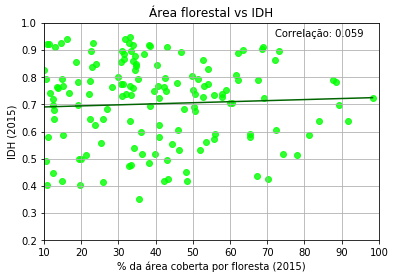

In [34]:
x = data_base["% da área coberta por floresta (2015)"]
y = data_base["IDH (2015)"]

reta(x, y, "Área florestal vs IDH",[10, 100, 0.2, 1], "% da área coberta por floresta (2015)", "IDH (2015)", 'lime', 'darkgreen', 0.059) 

Para uma análise mais visual, plotou-se um gráfico do tipo de crosstab que pode ser interpretado da seguinte forma: dividiu-se as faixas de IDH em 5, e o mesmo com a variável em questão. Com as diferentes faixas, pode-se visualizar que as vermelhas são aquelas que representam menor área florestal, enquanto a salmão, as maiores. Como a faixa vermelha nao decresce conforme o IDH aumenta, nem que a mesma cresce conforme o IDH também aumenta, é possivel confirmar que o país que não tem uma grande porcentagem de árvores não é afetado em seu IDH, e o mesmo acontece para aqueles que possuem muitas árvores comparado a área em seu pais. As demais cores servem para auxiliar na interpretação, porém as anteriormentes citadas são as de melhor análise.

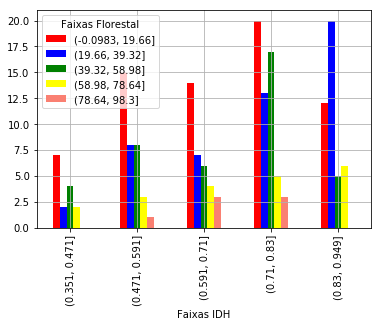

In [35]:
fx_fl = pd.crosstab(data_base["Faixas IDH"], data_base["Faixas Florestal"])
fx_fl.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.grid()

### B) Análise do IDH juntamente com a variável "% de pessoas com saneamento básico (2015)"

Para a segunda variável, ao plotar o valor do coeficiente de correlação linear, obteve-se o valor de 0.879, que por estar muito perto do 1, pode se inferir que o saneamento básico interfere no IDH dos países. Porém, como dito acima, a reta MMQ foi plotada junta ao gráfico de dispersão para melhor saber como funciona tal relação apontada pelo coeficiente. Portanto, percebe-se que a reta é crescente, e que os pontos seguem tal reta de forma alinhada, o que confirma uma relação entre o IDH e o saneamento básico. Para melhor responder a pergunta, foi feita uma análise temporal para estudar se tal padrão prevalece durante os anos.

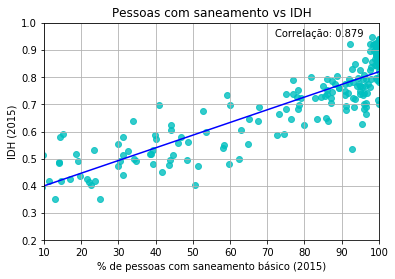

In [36]:
x = data_base["% de pessoas com saneamento básico (2015)"]
y = data_base["IDH (2015)"]

reta(x, y,"Pessoas com saneamento vs IDH" , [10, 100, 0.2, 1], "% de pessoas com saneamento básico (2015)","IDH (2015)", "c", "blue", 0.879)

O gráfico abaixo tem um efeito muito mais notável em comparação com a variável da área verde, visto que já foi estabelecida uma relação entre os dois (IDH e saneamento) no gráfico anterior. Para analisá-lo, é recomendável seguir o mesmo padrão anterior, onde a cor vermelha representa a menor faixa de saneamento e a salmão, a maior. Então, conforme a faixa de IDH aumenta, a cor vermelha começa a desaparcer, enquanto a salmão se sobre sai, confirmando a relação descoberta acima, em que a porcentagem do saneamento básico acaba por afetar o IDH. 

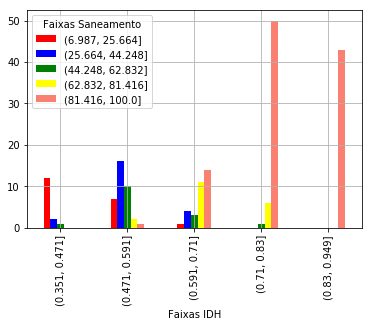

In [37]:
fx_sn = pd.crosstab(data_base["Faixas IDH"], data_base["Faixas Saneamento"])
fx_sn.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.grid()

## 6. Análise temporal

A seguir todos os gráficos foram plotados com a utilização de um for, para limpeza e melhor desempenho do código. A análise temporal de cada variável sera comentada a seguir.

### A) Análise do IDH juntamente com a variável  "% da área coberta por floresta (temporal)"

Ao analisar os dados de 2010 até 2015 sobre a área floretsal de um país, é possível ver que incrivelmente, todos os anos tem um padrão quase igual, não mudando quase nada de um ano para o outro. Esta conclusão pode ser obtida pois além de ver visualmente o gráfico e seus dados arranjados de uma maneira parecida, foi plotado o coeficiente de correlação de cada ano no canto direito superior do gráfico. O mesmo varia apenas a partir da terceira casa decimal em muito dos gráficos, variando de 0.042 em 2010 para 0.059 em 2015 (o ano de análise). Pode-se então inferir que durante esses 5 anos de análse temporal, a área florestal não teve nenhum papel no IDH. A reta MMQ está em uma inclonação nula em todos os gráficos, em relação ao eixo x.

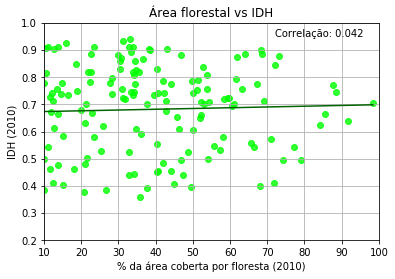

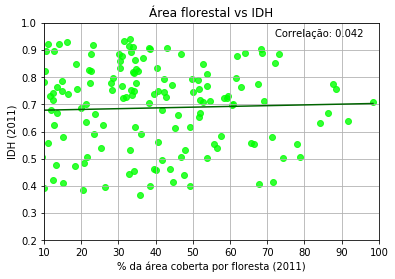

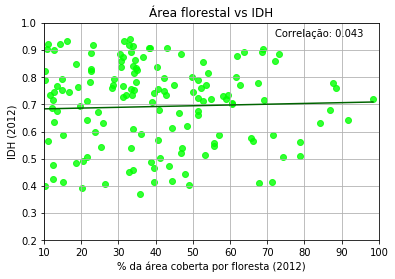

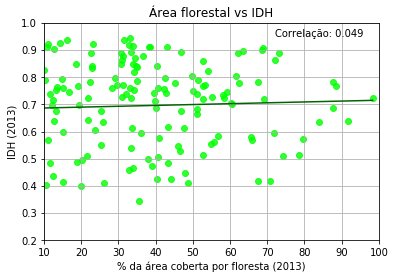

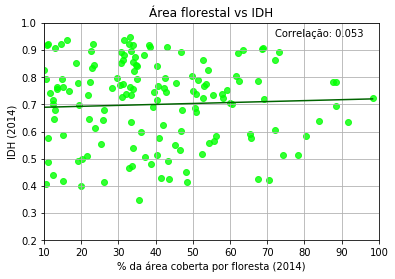

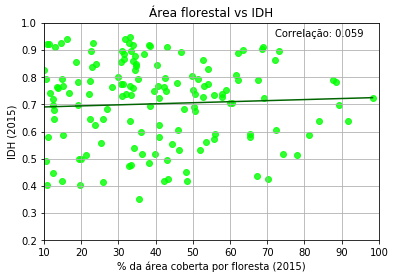

In [38]:
for i in range(2010, 2015):
    
    HDI10 = pd.read_excel('hdi_human_development_index.xlsx').set_index('geo').loc[:, [i]]
    HDI10.columns = ["IDH ({})".format(i)]

    nt10 = pd.read_excel('forest_coverage_percent.xlsx').set_index('geo').loc[:, [i]]
    nt10.columns = ["% da área coberta por floresta ({})".format(i)]

    data_base10 = HDI10.join(nt10, how="inner")

    data_base10.index.names = ['Country']
    
    correl = data_base10.corr()
    
    reta(data_base10["% da área coberta por floresta ({})".format(i)], data_base10["IDH ({})".format(i)], "Área florestal vs IDH",[10, 100, 0.2, 1], "% da área coberta por floresta ({})".format(i), "IDH ({})".format(i), 'lime', 'darkgreen', correl["% da área coberta por floresta ({})".format(i)][0]) 

reta(data_base["% da área coberta por floresta (2015)"], data_base["IDH (2015)"], "Área florestal vs IDH",[10, 100, 0.2, 1], "% da área coberta por floresta (2015)", "IDH (2015)", 'lime', 'darkgreen', 0.059)    

### B) Análise do IDH juntamente com a variável "% de pessoas com saneamento básico (temporal)"

Como na análise temporal da variável acima, a porcentagem de pessoas com saneamento básico mínimo entre os anos de 2010 e 2015 não teve alteração relevante para ser considerada. Com o mesmo aspecto, as retas e arranjo dos dados nos anos plotados se assemelham muito, com um ângulo de inclinação visivelmente parecido, e como dito na análise individual do ano de 2015 da variável, há uma grande concentração dos dados do lado direito, o que se repete de 2010 até 2015. Por fim, foi plotado o coeficiente de correlação linear de todos, que demonstrou igual comportamento ao visualizado acima, uma variação quase nula, em que o mesmo vai de 0.896 - 0.879, sendo então, desprezível sua variação, e seu coeficiente igual em todos os anos. 

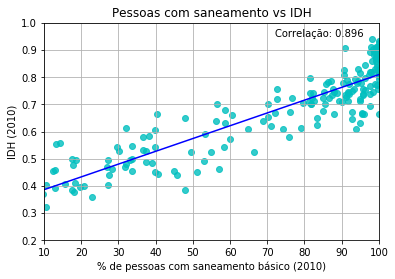

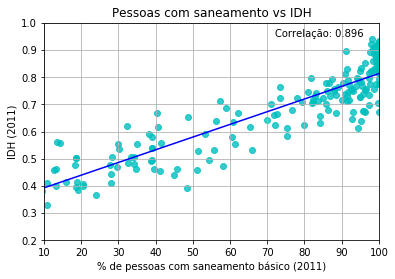

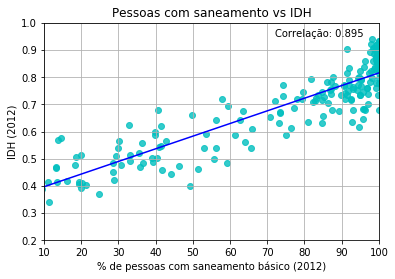

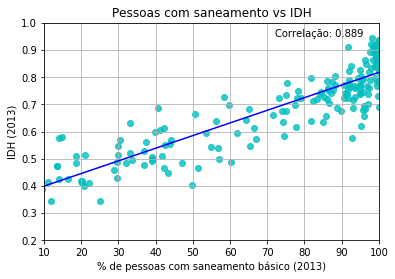

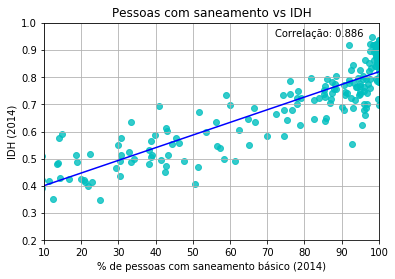

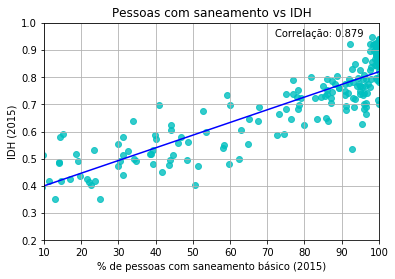

In [39]:
for i in range(2010, 2015):
    
    HDI11 = pd.read_excel('hdi_human_development_index.xlsx').set_index('geo').loc[:, [i]]
    HDI11.columns = ["IDH ({})".format(i)]

    elec11 = pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx').set_index('geo').loc[:, [i]]
    elec11.columns = ["% de pessoas com saneamento básico ({})".format(i)]
    
    data_base11 = HDI11.join(elec11, how="inner")

    data_base11.index.names = ['Country']
    
    correl = data_base11.corr()
    
    reta(data_base11["% de pessoas com saneamento básico ({})".format(i)], data_base11["IDH ({})".format(i)], "Pessoas com saneamento vs IDH",[10, 100, 0.2, 1], "% de pessoas com saneamento básico ({})".format(i), "IDH ({})".format(i), 'c', 'blue', correl["% de pessoas com saneamento básico ({})".format(i)][0]) 
    
reta(data_base["% de pessoas com saneamento básico (2015)"],data_base["IDH (2015)"],"Pessoas com saneamento vs IDH" , [10, 100, 0.2, 1], "% de pessoas com saneamento básico (2015)","IDH (2015)", "c", "blue", 0.879)

## 7. Conclusão

Pode-se então concluir, que quando se trata da variável "% da área coberta por floresta", a hipótese apresentada na Introdução, a qual aclamava uma relação entre a área florestal em um país e o IDH, não pode ser considerada correta. Com apenas um plot (2015), tal conclusão já podia ser deduzida, porém, com o DataFrame de 5 anos da mesma variável, que são quase iguais, pode-se dizer que a área florestal não afeta o IDH de um país, com uma maior certeza. Talvez, caso a maioria dos países deixassem de ter uma área grande de árvores, um impacto poderia ser causado em todo o IDH mundial, porém tal hipótese ficaria para uma iteração futura.

Para a segunda variável ("% de pessoas com saneamento básico"), a hipótese formulada foi a de que um país com alto IDH, também investe muito em saneamento básico, já que o mesmo é responsável por previnir muitas doenças. Portanto, ao analisar o ano de 2015, pode-se dizer que tal hipótese pode ser verdadeira, como comentado nas explicações anteriores. Com a análise temporal, é então confirmado tal pensamento, já que durante os 5 anos, o padrão contnua igual. Porém, apesar de terem uma relação, não é possivel com certeza dizer quem exerce o papel de causa e consequência, o que ficaria para um trabalho futuro. 